In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "../input/cat-and-dog/training_set/training_set/",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )


Found 8005 images belonging to 2 classes.


In [4]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "../input/cat-and-dog/test_set/test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 2023 images belonging to 2 classes.


### from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [6]:
from tensorflow.keras.regularizers import l2

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [15]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [16]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/15
251/251 [==============================] - 97s 381ms/step - loss: 0.9434 - accuracy: 0.5445 - val_loss: 0.7880 - val_accuracy: 0.6762
Epoch 2/15
251/251 [==============================] - 50s 199ms/step - loss: 0.7464 - accuracy: 0.6452 - val_loss: 0.6907 - val_accuracy: 0.6530
Epoch 3/15
251/251 [==============================] - 48s 190ms/step - loss: 0.6852 - accuracy: 0.6735 - val_loss: 0.7243 - val_accuracy: 0.7177
Epoch 4/15
251/251 [==============================] - 50s 198ms/step - loss: 0.6434 - accuracy: 0.7036 - val_loss: 0.6437 - val_accuracy: 0.7257
Epoch 5/15
251/251 [==============================] - 44s 177ms/step - loss: 0.6221 - accuracy: 0.7071 - val_loss: 0.5947 - val_accuracy: 0.7435
Epoch 6/15
251/251 [==============================] - 45s 181ms/step - loss: 0.5854 - accuracy: 0.7293 - val_loss: 0.5453 - val_accuracy: 0.7573
Epoch 7/15
251/251 [==============================] - 45s 179ms/step - loss: 0.5706 - accuracy: 0.7338 - val_loss: 0.5473 - val_ac

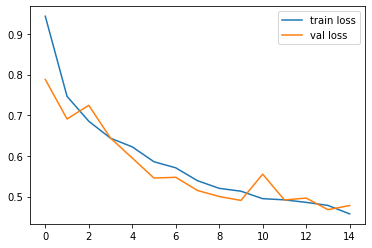

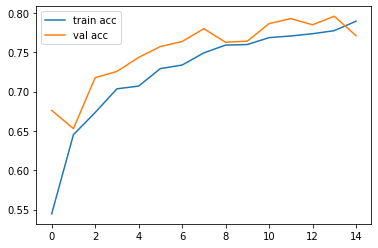

In [17]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

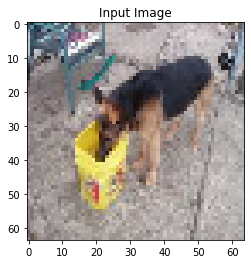

[[2.5762732]]


In [22]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Load the test image
test_image_path = '../input/cat-and-dog/training_set/training_set/dogs/dog.1023.jpg'
test_image = image.load_img(test_image_path, target_size=(64, 64))

# Convert the image to a NumPy array
test_image_array = image.img_to_array(test_image)
test_image_array = test_image_array / 255
test_image_array = np.expand_dims(test_image_array, axis=0)

# Display the input image
plt.imshow(test_image_array[0])
plt.title('Input Image')
plt.show()

# Make predictions
result = cnn.predict(test_image_array)
print(result)


In [19]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
